# FEATURE SELECTION 2
<hr style="height:1px;border:none;color:#333;background-color:#333;" />
<br>

In [84]:
# import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel, f_classif, mutual_info_classif, mutual_info_regression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso

In [44]:
pd.set_option('display.max_columns', None) # display all the columns of a dataframe
pd.set_option('display.max_rows', 100)     # display 100 rows of a dataframe

In [177]:
# Load cleaned data - see "Data Cleansing.ipynb"
dataset = pd.read_csv('../ariel/Price_Data_cleaned.csv')

<hr style="height:1px;border:none;color:#333;background-color:#333;" />

In [8]:
# Team decided the following columns are not needed
# columns_to_remove = ['MSSubClass','Street','LotShape','LandContour','LandSlope','GarageYrBlt','GarageArea','MoSold','YrSold','SaleType','SaleCondition']
# columns_to_remove = ['MSSubClass','Street','LotShape','LandContour','LandSlope','GarageYrBlt','GarageArea','MoSold','YrSold','SaleType','SaleCondition']
# dataset.drop(columns=columns_to_remove, inplace=True)

<hr style="height:1px;border:none;color:#333;background-color:#333;" />

In [62]:
dataset['MiscVal']


2579

In [64]:
dataset['MiscFeature'].value_counts()/ dataset.shape[0] * 100

None    96.238852
Shed     3.412175
Gar2     0.193874
Othr     0.116324
TenC     0.038775
Name: MiscFeature, dtype: float64

In [178]:
# Since 96% do not have MiscFeature
dataset.drop(['MiscFeature','MiscVal'], axis=1, inplace=True)

In [69]:
# Number of houses with a pool
dataset['PoolQC'].value_counts()

None    2570
TA         3
Gd         2
Fa         2
Ex         2
Name: PoolQC, dtype: int64

In [179]:
# Removing PoolArea and PoolQC since there are only 9 houses with a pool
dataset.drop(['PoolArea','PoolQC'], axis=1, inplace=True)

In [97]:
dataset.sort_values(by = 'SalePrice', ascending = False)[:20]

,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MoSold,YrSold,SaleType,SaleCondition
1007,4316,755000,60,RL,74.0,21535,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455.0,Unf,0.0,989.0,2444.0,GasA,Ex,Y,SBrkr,2444,1872,0,0.0,1.0,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3.0,832.0,TA,TA,Y,382,50,0,0,0,None,1,2007,WD,Normal
1325,3627,625000,60,RL,75.0,35760,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1995,1996,Hip,CompShg,HdBoard,HdBoard,BrkFace,1378.0,Gd,Gd,PConc,Ex,TA,Gd,GLQ,1387.0,Unf,0.0,543.0,1930.0,GasA,Ex,Y,SBrkr,1831,1796,0,1.0,0.0,3,1,4,1,Gd,10,Typ,1,TA,Attchd,1995.0,Fin,3.0,807.0,TA,TA,Y,361,76,0,0,0,None,7,2006,WD,Normal
65,2470,615000,20,RL,77.0,12720,Pave,None,Reg,HLS,AllPub,Inside,Mod,NridgHt,Norm,Norm,1Fam,1Story,10,5,2003,2003,Hip,CompShg,MetalSd,MetalSd,Stone,680.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2257.0,Unf,0.0,278.0,2535.0,GasA,Ex,Y,SBrkr,2470,0,0,2.0,0.0,1,1,1,1,Ex,7,Typ,2,Gd,Attchd,2003.0,Fin,3.0,789.0,TA,TA,Y,154,65,0,0,216,None,2,2008,WD,Normal
584,2364,611657,20,RL,75.0,12919,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2009,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2188.0,Unf,0.0,142.0,2330.0,GasA,Ex,Y,SBrkr,2364,0,0,1.0,0.0,2,1,2,1,Ex,11,Typ,2,Gd,Attchd,2009.0,Fin,3.0,820.0,TA,TA,Y,0,67,0,0,0,None,3,2010,New,Partial
1639,2674,610000,20,RL,53.0,13693,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,PosA,PosA,1Fam,1Story,10,5,2007,2007,Hip,CompShg,VinylSd,VinylSd,Stone,472.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2288.0,Unf,0.0,342.0,2630.0,GasA,Ex,Y,SBrkr,2674,0,0,2.0,0.0,2,1,2,1,Ex,8,Typ,2,Gd,Attchd,2007.0,Fin,3.0,762.0,TA,TA,Y,360,50,0,0,0,None,3,2009,WD,Normal
615,2338,591587,20,RL,78.0,51974,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,PosN,Norm,1Fam,1Story,9,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,BrkFace,710.0,Ex,TA,PConc,Ex,TA,Av,GLQ,1101.0,Unf,0.0,1559.0,2660.0,GasA,Ex,Y,SBrkr,2338,0,0,1.0,0.0,2,1,4,1,Gd,8,Typ,2,Gd,Attchd,2006.0,Fin,3.0,1110.0,Gd,TA,Y,0,135,0,0,322,None,6,2007,New,Partial
2087,3500,584500,60,RL,40.0,17242,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,9,5,1993,1994,Hip,CompShg,MetalSd,MetalSd,BrkFace,738.0,Gd,Gd,PConc,Ex,TA,Gd,Rec,292.0,GLQ,1393.0,48.0,1733.0,GasA,Ex,Y,SBrkr,1933,1567,0,1.0,0.0,3,1,4,1,Ex,11,Typ,1,TA,Attchd,1993.0,RFn,3.0,959.0,TA,TA,Y,870,86,0,0,210,None,5,2006,WD,Normal
1112,2402,555000,20,RL,79.0,15431,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1767.0,ALQ,539.0,788.0,3094.0,GasA,Ex,Y,SBrkr,2402,0,0,1.0,0.0,2,0,2,1,Ex,10,Typ,2,Gd,Attchd,2008.0,Fin,3.0,672.0,TA,TA,Y,0,72,0,0,170,None,4,2009,WD,Normal
802,3279,538000,60,RL,21.0,53504,Pave,None,IR2,HLS,AllPub,CulDSac,Mod,StoneBr,Norm,Norm,1Fam,2Story,8,5,2003,2003,Hip,CompShg,CemntBd,Wd Shng,BrkFace,603.0,Ex,TA,PConc,Gd,TA,Gd,ALQ,1416.0,Unf,0.0,234.0,1650.0,GasA,Ex,Y,SBrkr,1690,1589,0,1.0,0.0,3,1,4,1,Ex,12,Mod,1,Gd,BuiltIn,2003.0,Fin,3.0,841.0,TA,TA,Y,503,36,0,0,210,None,6,2010,WD,Normal
407,2698,535000,60,RL,92.0,16052,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,2Story,10,5,2006,2006,Hip,CompShg,VinylSd,V

In [ ]:
# Remove outliers (SalePrice) TBD
# high_priced_house = housing.index.isin([8])
# low_priced_house = housing.index.isin([428])
# housing2=data[~high_priced_house]
# housing2=data[~low_priced_house]

In [180]:
# Ordinal Variables
dataset.BsmtExposure.replace({'None':0, 'No':0, 'Mn':1, 'Av':4, 'Gd':5}, inplace=True)
dataset.BsmtQual.replace({'None':0,'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
dataset.BsmtCond.replace({'None':0,'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
dataset.BsmtFinType1.replace({'None':0,'Unf':1, 'LwQ':1, 'BLQ':2, 'Rec':3, 'ALQ':3,'GLQ':4}, inplace=True)
dataset.BsmtFinType2.replace({'None':0,'Unf':1, 'LwQ':1, 'BLQ':2, 'Rec':3, 'ALQ':3,'GLQ':4}, inplace=True)

In [181]:
dataset.ExterQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
dataset.ExterCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
dataset.HeatingQC.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
dataset.FireplaceQu.replace({'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
# dataset.GarageFinish.replace({'None':0, 'Unf':1, 'RFn':2, 'Fin':3}, inplace=True)
dataset.GarageQual.replace({'None':0,'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
dataset.KitchenQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

In [183]:
# dataset['Fence'].value_counts()
dataset['Fence'].value_counts()/ dataset.shape[0] * 100

None     79.643273
MnPrv    11.671190
GdPrv     4.303994
GdWo      3.993796
MnWw      0.387747
Name: Fence, dtype: float64

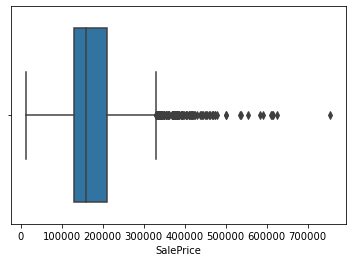

In [77]:
# Sale
sns.boxplot(dataset['SalePrice'])

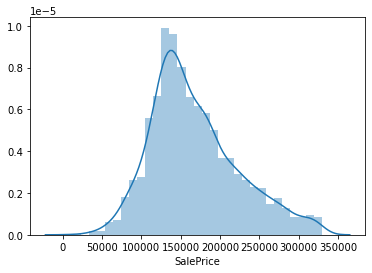

In [100]:
sns.distplot(dataset[dataset['SalePrice']<330001]['SalePrice'])

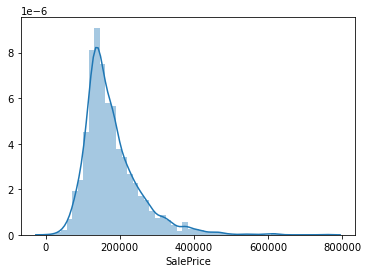

In [89]:
sns.distplot(dataset['SalePrice'])



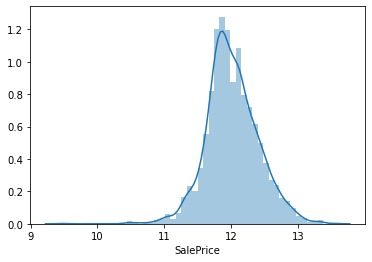

In [102]:
sns.distplot(np.log(dataset['SalePrice']))

In [114]:
((dataset['SalePrice'])).describe()

count      2579.000000
mean     178053.442420
std       75044.983207
min       12789.000000
25%      129950.000000
50%      159900.000000
75%      209750.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [115]:
(np.log(dataset['SalePrice'])).describe()

count    2579.000000
mean       12.013411
std         0.387392
min         9.456341
25%        11.774905
50%        11.982304
75%        12.253671
max        13.534473
Name: SalePrice, dtype: float64

<br><br>
## Encoding Categorical Features
<hr style="height:1px;border:none;color:#333;background-color:#333;" />

In [184]:
# Generate correlation matrix
corr_matrix = dataset.corr(method="pearson") # pearson? kendall? which is best

In [231]:
# features with high correlation
# temp = corr_matrix[(corr_matrix>-1) & (corr_matrix<1.0)].drop('SalePrice').drop('SalePrice', axis=1)
# temp2 = temp[temp[temp.isna().any(axis=1)].sum()>0]
# temp2[temp2.index]
corr_matrix['TotRmsAbvGrd']

GrLivArea        0.807432
SalePrice        0.490206
MSSubClass       0.032076
LotFrontage     -0.012554
LotArea          0.204511
OverallQual      0.360846
OverallCond     -0.072538
YearBuilt        0.095630
YearRemodAdd     0.185554
MasVnrArea       0.261524
ExterQual        0.239935
ExterCond       -0.013612
BsmtQual         0.155035
BsmtCond         0.008098
BsmtExposure    -0.004053
BsmtFinType1    -0.051461
BsmtFinSF1       0.017111
BsmtFinType2    -0.065479
BsmtFinSF2      -0.052973
BsmtUnfSF        0.260371
TotalBsmtSF      0.259746
HeatingQC        0.172461
1stFlrSF         0.374581
2ndFlrSF         0.588033
LowQualFinSF     0.098114
BsmtFullBath    -0.058036
BsmtHalfBath    -0.049515
FullBath         0.534636
HalfBath         0.350061
BedroomAbvGr     0.693548
KitchenAbvGr     0.305213
KitchenQual      0.254914
TotRmsAbvGrd     1.000000
Fireplaces       0.299915
FireplaceQu      0.338942
GarageYrBlt      0.072347
GarageCars       0.353764
GarageArea       0.320369
GarageQual  

In [199]:
# Removing two highly correlated variables: GarageYrBlt and GarageArea
dataset.drop(['GarageYrBlt','GarageArea'], axis=1, inplace=True)

In [206]:
# set the following columns to object
dataset['MSSubClass'] = dataset['MSSubClass'].astype(object)
dataset['MoSold'] = dataset['MoSold'].astype(object)

In [207]:
dataset.dtypes.sort_values()

GrLivArea          int64
BsmtQual           int64
BsmtCond           int64
BsmtExposure       int64
BsmtFinType1       int64
HeatingQC          int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual        int64
TotRmsAbvGrd       int64
Fireplaces         int64
FireplaceQu        int64
GarageQual         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
YrSold             int64
ExterCond          int64
ExterQual          int64
BsmtFinType2       int64
LotArea            int64
SalePrice          int64
OverallQual        int64
YearRemodAdd       int64
YearBuilt          int64
OverallCond        int64
GarageCars       float64
BsmtHalfBath     float64
BsmtFullBath     float64
TotalBsmtSF      float64
BsmtUnfSF        float64
MasVnrArea       float64
LotFrontage      float64


In [208]:
# new dataset that will hold the encoded categorical variables + all the others
dataset_encoded = dataset.copy()

In [209]:
# List of categorical columns
object_columns = dataset_encoded.select_dtypes("object").columns

In [210]:
# Encode all categorical variables
for column_name in dataset_encoded.select_dtypes(include="object").columns:
    dataset_encoded = pd.concat([dataset_encoded, pd.get_dummies(dataset_encoded[column_name], prefix=column_name, drop_first=True)], axis=1)

In [211]:
# Remove original categorical columns
dataset_encoded = dataset_encoded.drop(object_columns, axis=1)

In [212]:
dataset_encoded

,GrLivArea,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,YrSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSewr,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,856,126000,42.0,7890,6,6,1939,1950,0.0,3,3,3,3,0,3,238.0,1,0.0,618.0,856.0,3,856,0,0,1.0,0.0,1,0,2,1,3,4,1,4,2.0,3,0,0,0,0,166,2010,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,

<br><br>
## Eliminating Highly Correlated Features
<hr style="height:1px;border:none;color:#333;background-color:#333;" />

In [16]:
# Generate correlation matrix
corr_matrix = dataset_encoded.corr(method="pearson") # pearson? kendall? which is best

In [17]:
# features with high correlation
temp = corr_matrix[(corr_matrix>0.89) & (corr_matrix<1.0)].drop('SalePrice').drop('SalePrice', axis=1)
temp2 = temp[temp[temp.isna().any(axis=1)].sum()>0]
temp2[temp2.index]

,MSSubClass_80,MSSubClass_190,BldgType_2fmCon,HouseStyle_SLvl,Exterior1st_CemntBd,Exterior1st_MetalSd,Exterior1st_VinylSd,Exterior2nd_CmentBd,Exterior2nd_MetalSd,Exterior2nd_VinylSd,SaleType_New,SaleCondition_Partial
MSSubClass_80,NaN,NaN,NaN,0.959356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSSubClass_190,NaN,NaN,0.971413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BldgType_2fmCon,NaN,0.971413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HouseStyle_SLvl,0.959356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Exterior1st_CemntBd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.978576,NaN,NaN,NaN,NaN
Exterior1st_MetalSd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.969285,NaN,NaN,NaN
Exterior1st_VinylSd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.979144,NaN,NaN
Exterior2nd_CmentBd,NaN,NaN,NaN,NaN,0.978576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Exterior2nd_MetalSd,NaN,NaN,NaN,NaN,NaN,0.969285,NaN,NaN,NaN,NaN,NaN,NaN
Exterior2nd_VinylSd,NaN,NaN,NaN,NaN,NaN,NaN,0.979144,NaN,NaN,NaN,NaN,NaN


In [ ]:
# plot the correlation matrix (note: not all of the features fit the plot)
fig=plt.figure(figsize=(20,16))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, center= 0)

<br><br>
## Top 20 Features - Correlation Between Target and Feature
<hr style="height:1px;border:none;color:#333;background-color:#333;" />

In [18]:
# Return the top n features using the correlation between target and feature
abs(corr_matrix['SalePrice']).sort_values(ascending=False).head(20)#.index[1:21]

SalePrice           1.000000
OverallQual         0.790661
GrLivArea           0.719980
TotalBsmtSF         0.652540
1stFlrSF            0.642623
GarageCars          0.638640
GarageArea          0.634706
ExterQual_TA        0.580623
YearBuilt           0.544569
FullBath            0.535175
KitchenQual_TA      0.520063
YearRemodAdd        0.514718
Foundation_PConc    0.507896
MasVnrArea          0.498513
TotRmsAbvGrd        0.490206
Fireplaces          0.488173
FireplaceQu_None    0.480091
ExterQual_Gd        0.464270
BsmtFinSF1          0.461056
BsmtFinType1_GLQ    0.460768
Name: SalePrice, dtype: float64

<br><br>
<hr style="height:1px;border:none;color:#333;background-color:#333;" />

In [215]:
X = dataset_encoded.drop('SalePrice',axis=1)  # featuresd
y = dataset_encoded['SalePrice']              # target
X_norm = MinMaxScaler().fit_transform(X)      # Transform features by scaling each feature to a given range.

<br><br>
## Using Lasso Regression to Select Features
<hr style="height:1px;border:none;color:#333;background-color:#333;" />

In [232]:
num_f = 50 # number of features to select
# SelectFromModel -> Meta-transformer for selecting features based on importance weights.
embeded_lr_selector = SelectFromModel(Lasso(alpha=0.1), max_features=num_f)
# Penalty="l1" -> indicates regularization using L1
embeded_lr_selector.fit(X_norm, y) # Fit the SelectFromModel meta-transformer.

embeded_lr_support = embeded_lr_selector.get_support() # Get a mask, or integer index, of the features selected
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist() # List of features
print(str(len(embeded_lr_feature)), 'selected features')

50 selected features


In [233]:
# embeded_lr_feature
# list_features = [x[0:(x.find("_"))] for x in embeded_lr_feature]
list_features = []
for column_name in embeded_lr_feature:
    if '_' in column_name:
        list_features.append(column_name[0:column_name.find("_")])
    else:
        list_features.append(column_name)


In [234]:
embeded_lr_feature

['GrLivArea',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'ExterQual',
 'BsmtCond',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'Fireplaces',
 'GarageCars',
 'ScreenPorch',
 'MSSubClass_120',
 'MSSubClass_150',
 'MSSubClass_160',
 'MSSubClass_180',
 'MSSubClass_190',
 'LandSlope_Sev',
 'Neighborhood_BrDale',
 'Neighborhood_GrnHill',
 'Neighborhood_Landmrk',
 'Neighborhood_NPkVill',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Condition1_PosN',
 'Condition2_PosA',
 'Condition2_PosN',
 'Condition2_RRAe',
 'HouseStyle_SLvl',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_WdShngl',
 'Exterior1st_AsphShn',
 'Exterior1st_ImStucc',
 'Exterior1st_PreCast',
 'Exterior2nd_AsphShn',
 'Heating_OthW',
 'GarageType_None',
 'SaleType_Con',
 'SaleCondition_Partial']

In [235]:
list_feat = set(list_features)

In [236]:
dataset[list_feat].dtypes.sort_values()

BsmtCond           int64
ScreenPorch        int64
YearBuilt          int64
Fireplaces         int64
GrLivArea          int64
KitchenQual        int64
LowQualFinSF       int64
BedroomAbvGr       int64
OverallCond        int64
2ndFlrSF           int64
OverallQual        int64
1stFlrSF           int64
LotArea            int64
ExterQual          int64
KitchenAbvGr       int64
TotalBsmtSF      float64
MasVnrArea       float64
GarageCars       float64
BsmtFinSF2       float64
BsmtFinSF1       float64
Exterior1st       object
Heating           object
Neighborhood      object
MSSubClass        object
RoofMatl          object
LandSlope         object
SaleType          object
GarageType        object
SaleCondition     object
Condition2        object
Condition1        object
HouseStyle        object
Exterior2nd       object
dtype: object

<br><br>
## Using Random Forest to Select Features
<hr style="height:1px;border:none;color:#333;background-color:#333;" />

In [295]:
from sklearn.ensemble import RandomForestClassifier
num_f = 20 # number of features to select
# SelectFromModel -> Meta-transformer for selecting features based on importance weights.
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=num_f)
# n_estimators -> The number of trees in the forest.
embeded_rf_selector.fit(X, y) # Fit the SelectFromModel meta-transformer.

embeded_rf_support = embeded_rf_selector.get_support() # Get a mask, or integer index, of the features selected
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist() # List of features
print(str(len(embeded_rf_feature)), 'selected features')

20 selected features


In [296]:
embeded_rf_feature

['GrLivArea',
 'LotFrontage',
 'LotArea',
 'Neighborhood',
 'YearBuilt',
 'YearRemodAdd',
 'Exterior2nd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'MoSold',
 'YrSold']

<br><br>
## Using F Test to Select Features
<hr style="height:1px;border:none;color:#333;background-color:#333;" />
Note: Categorical variables have been encoded, is that enough?

In [96]:
value_f, p_f = f_classif(X_norm, y)
pd.Series(p_f, index=X.columns).sort_values().head(20)

SaleCondition_Partial     0.000000e+00
SaleType_New              0.000000e+00
Functional_Sal            0.000000e+00
BsmtCond_Po               0.000000e+00
Exterior1st_ImStucc       0.000000e+00
Condition2_RRAn           0.000000e+00
Condition2_PosN           0.000000e+00
MSSubClass_150            0.000000e+00
SaleCondition_Alloca     8.146065e-305
OverallQual              3.640980e-271
Condition2_PosA          3.008646e-213
GrLivArea                2.544883e-177
Street_Pave              1.161482e-171
Neighborhood_NridgHt     2.191582e-135
BsmtQual_Po              9.254633e-129
Neighborhood_NoRidge     8.940149e-124
1stFlrSF                 1.045746e-112
TotalBsmtSF              3.097936e-111
GarageQual_Po            6.678465e-109
GarageCars               5.613187e-107
dtype: float64

<br><br>
## Using Mutual Information to Select Features
<hr style="height:1px;border:none;color:#333;background-color:#333;" />

In [103]:
# mutual_scores = mutual_info_classif(X_norm, y)
mutual_scores = mutual_info_regression(X_norm, y)
pd.Series(mutual_scores, index=X.columns).sort_values(ascending=False)

OverallQual            0.578345
GrLivArea              0.496115
TotalBsmtSF            0.396397
YearBuilt              0.393802
GarageArea             0.386161
                         ...   
MSSubClass_190         0.000000
Exterior2nd_Wd Shng    0.000000
Condition1_PosN        0.000000
MSZoning_I (all)       0.000000
GarageType_Basment     0.000000
Length: 291, dtype: float64

In [105]:
pd.Series(mutual_scores, index=X.columns).sort_values(ascending=False)

OverallQual              0.578345
GrLivArea                0.496115
TotalBsmtSF              0.396397
YearBuilt                0.393802
GarageArea               0.386161
GarageCars               0.373603
1stFlrSF                 0.365046
GarageYrBlt              0.292285
YearRemodAdd             0.266998
FullBath                 0.251178
ExterQual_TA             0.228485
TotRmsAbvGrd             0.210327
KitchenQual_TA           0.209040
ExterQual_Gd             0.207288
2ndFlrSF                 0.203996
Foundation_PConc         0.195050
Fireplaces               0.191559
BsmtQual_TA              0.183991
OpenPorchSF              0.183795
BsmtFinSF1               0.170368
FireplaceQu_None         0.169594
LotArea                  0.159000
BsmtQual_Gd              0.154258
KitchenQual_Gd           0.151816
MasVnrArea               0.142432
OverallCond              0.134471
GarageFinish_Unf         0.134124
BsmtFinType1_GLQ         0.127783
MSSubClass_60            0.118980
BsmtUnfSF     

In [97]:
X.iloc[:,:]

,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSewr,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_Po,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Po,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDriv